In [3]:
import numpy as np 
import pandas as pd 
from scipy import linalg
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn

np.random.seed(100)  

## 1. Loading the Data


In [6]:
#Data composited every 2 metres
two_composite_filtered = pd.read_csv("../Curated_data/two_composite_filtered.csv", low_memory=False)

# 2. Clustering

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

In [7]:
data = two_composite_filtered.iloc[:, 4:7]
data = np.array(data)

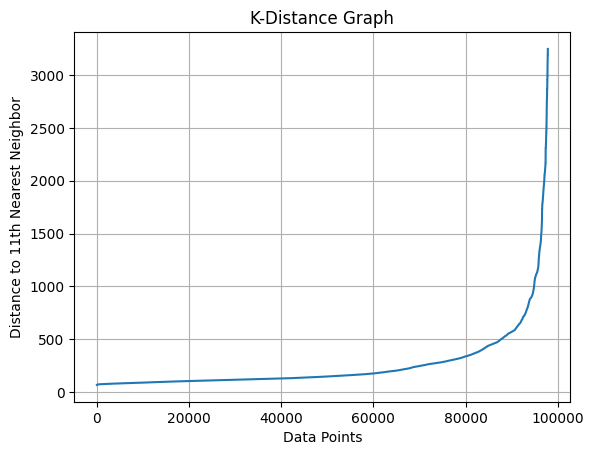

In [12]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate distances to the k-nearest neighbors
nn = NearestNeighbors(n_neighbors=1000)  # Adjust k as needed
nn.fit(data)
distances, _ = nn.kneighbors(data)

# Sort the distances
sorted_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.plot(range(len(data)), sorted_distances)
plt.xlabel("Data Points")
plt.ylabel("Distance to 11th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.grid()
plt.show()


C:\Users\flea0265\AppData\Local\Temp\ipykernel_16960\3572839616.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')


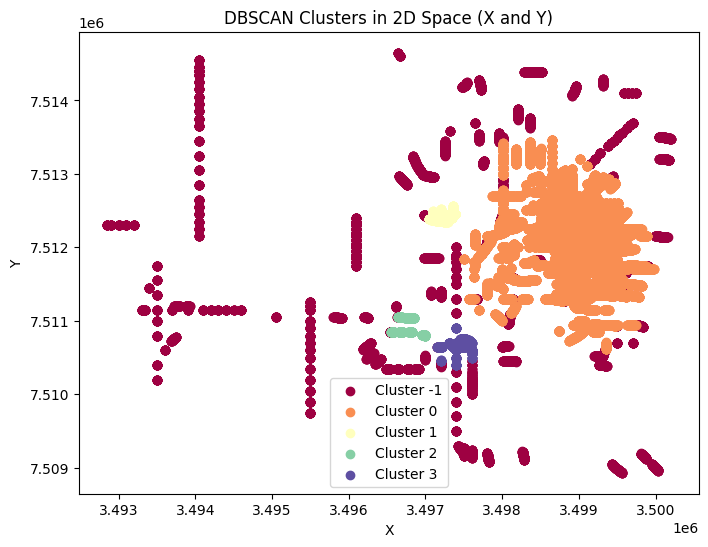

In [11]:
from sklearn.cluster import DBSCAN

epsilon = 250 
dbscan = DBSCAN(eps=epsilon, min_samples=500)  # Adjust min_samples as needed
clusters = dbscan.fit_predict(data)


import matplotlib.pyplot as plt

# Assuming you have already applied DBSCAN and obtained the 'clusters' labels

# Create a 2D scatter plot with two dimensions (X and Y)
plt.figure(figsize=(8, 6))

# Get unique cluster labels
unique_labels = np.unique(clusters)

# Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each point with a unique color based on its cluster label
for label, color in zip(unique_labels, colors):
    cluster_points = data[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clusters in 2D Space (X and Y)')

plt.legend()
plt.show()


In [16]:
epsilon = 250 
dbscan = DBSCAN(eps=epsilon, min_samples=800)  # Adjust min_samples as needed
clusters = dbscan.fit_predict(data)


C:\Users\flea0265\AppData\Local\Temp\ipykernel_16960\1091287695.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')


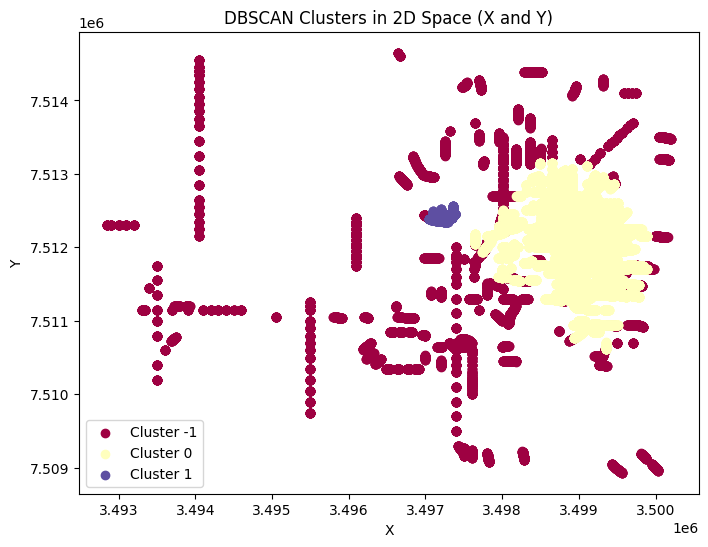

In [17]:
import matplotlib.pyplot as plt

# Assuming you have already applied DBSCAN and obtained the 'clusters' labels

# Create a 2D scatter plot with two dimensions (X and Y)
plt.figure(figsize=(8, 6))

# Get unique cluster labels
unique_labels = np.unique(clusters)

# Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each point with a unique color based on its cluster label
for label, color in zip(unique_labels, colors):
    cluster_points = data[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clusters in 2D Space (X and Y)')

plt.legend()
plt.show()


In [19]:
# Assuming 'clusters' contains cluster labels and 'two_composite_filtered' is your original DataFrame
cluster_label_to_select = 0  # The cluster label you want to select

# Filter the DataFrame to select only the data points in cluster 0
cluster_0_data = two_composite_filtered[clusters == cluster_label_to_select]

# 'cluster_0_data' now contains only the data points in cluster 0
# Assuming cluster_0_data is the DataFrame you want to save and you have a filename in mind
filename = "cluster_0_data.csv"

# Save the DataFrame as a CSV file
cluster_0_data.to_csv(filename, index=False)

In [ ]:
    cluster_points = data[clusters == 0]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')